### ***Music Genre Classification ***

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import keras 

import matplotlib.pyplot as plt
import random

import librosa
import math
     

In [ ]:
DATA_PATH = "/content/drive/MyDrive/music_genre_classification/Data/genres_original/data_10.json"
     

In [ ]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [ ]:
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [ ]:
X.shape

(9986, 130, 13)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [ ]:
#Apply Simple ANN
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])



In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
     

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)
     

Epoch 1/50
219/219 [==============================] - 9s 38ms/step - loss: 6.7119 - accuracy: 0.2721 - val_loss: 2.2944 - val_accuracy: 0.2363
Epoch 2/50
219/219 [==============================] - 9s 42ms/step - loss: 2.0801 - accuracy: 0.2873 - val_loss: 2.1705 - val_accuracy: 0.2664
Epoch 3/50
219/219 [==============================] - 8s 37ms/step - loss: 1.8839 - accuracy: 0.3471 - val_loss: 2.1194 - val_accuracy: 0.3304
Epoch 4/50
219/219 [==============================] - 7s 30ms/step - loss: 1.7858 - accuracy: 0.3827 - val_loss: 2.0920 - val_accuracy: 0.3588
Epoch 5/50
219/219 [==============================] - 9s 40ms/step - loss: 1.7075 - accuracy: 0.4014 - val_loss: 2.0398 - val_accuracy: 0.3288
Epoch 6/50
219/219 [==============================] - 9s 43ms/step - loss: 1.6103 - accuracy: 0.4449 - val_loss: 1.9871 - val_accuracy: 0.3835
Epoch 7/50
219/219 [==============================] - 9s 42ms/step - loss: 1.5244 - accuracy: 0.4714 - val_loss: 2.0603 - val_accuracy: 0.4065

In [ ]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()
     

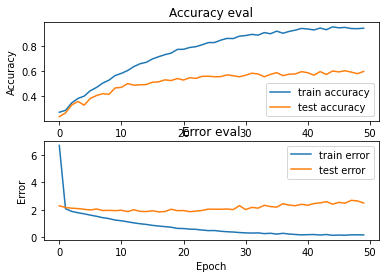

In [ ]:
plot_history(history)
     

In [ ]:
# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)
     

Epoch 1/100
219/219 [==============================] - 3s 13ms/step - loss: 25.3004 - accuracy: 0.1642 - val_loss: 3.8490 - val_accuracy: 0.2627
Epoch 2/100
219/219 [==============================] - 4s 18ms/step - loss: 7.5261 - accuracy: 0.1883 - val_loss: 3.4679 - val_accuracy: 0.1796
Epoch 3/100
219/219 [==============================] - 3s 13ms/step - loss: 4.9771 - accuracy: 0.1651 - val_loss: 3.4769 - val_accuracy: 0.1312
Epoch 4/100
219/219 [==============================] - 3s 12ms/step - loss: 4.1421 - accuracy: 0.1541 - val_loss: 3.4607 - val_accuracy: 0.1368
Epoch 5/100
219/219 [==============================] - 3s 12ms/step - loss: 3.8094 - accuracy: 0.1574 - val_loss: 3.4494 - val_accuracy: 0.1459
Epoch 6/100
219/219 [==============================] - 3s 11ms/step - loss: 3.6405 - accuracy: 0.1648 - val_loss: 3.4339 - val_accuracy: 0.1545
Epoch 7/100
219/219 [==============================] - 4s 17ms/step - loss: 3.5712 - accuracy: 0.1714 - val_loss: 3.4083 - val_accuracy

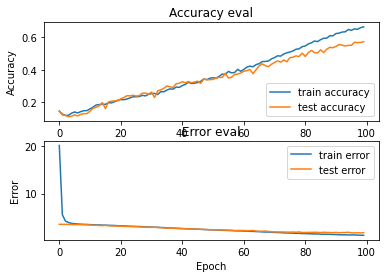

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)
     

In [ ]:
#convolutional neural network
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]
     


In [ ]:
X_train.shape

(5991, 130, 13, 1)

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [ ]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_cnn.summary()
     

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                      

In [ ]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)
     

Epoch 1/50
188/188 [==============================] - 14s 70ms/step - loss: 2.4508 - accuracy: 0.2145 - val_loss: 1.8454 - val_accuracy: 0.3518
Epoch 2/50
188/188 [==============================] - 13s 68ms/step - loss: 1.9362 - accuracy: 0.3398 - val_loss: 1.5810 - val_accuracy: 0.4406
Epoch 3/50
188/188 [==============================] - 13s 68ms/step - loss: 1.7002 - accuracy: 0.4068 - val_loss: 1.4421 - val_accuracy: 0.4780
Epoch 4/50
188/188 [==============================] - 13s 67ms/step - loss: 1.5624 - accuracy: 0.4488 - val_loss: 1.3511 - val_accuracy: 0.5194
Epoch 5/50
188/188 [==============================] - 13s 68ms/step - loss: 1.4539 - accuracy: 0.4809 - val_loss: 1.2925 - val_accuracy: 0.5347
Epoch 6/50
188/188 [==============================] - 13s 68ms/step - loss: 1.3927 - accuracy: 0.5111 - val_loss: 1.2328 - val_accuracy: 0.5547
Epoch 7/50
188/188 [==============================] - 13s 68ms/step - loss: 1.3298 - accuracy: 0.5345 - val_loss: 1.1862 - val_accuracy:

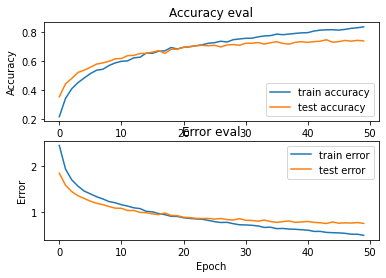

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [ ]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 1s - loss: 0.8304 - accuracy: 0.7213 - 1s/epoch - 16ms/step

Test accuracy: 0.7212654948234558


In [ ]:
model_cnn.save("Music_Genre_10_CNN")

In [ ]:
model_cnn.save("Music_Genre_10_CNN.h5")

In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")
     

In [ ]:
#prediction on test set
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]
     
#X_to_predict=np.expand_dims(X_to_predict,axis=0)


In [ ]:
X_to_predict.shape

(130, 13, 1)

In [ ]:
print("Real Genre:", y_to_predict)

Real Genre: 1


In [ ]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)
     

In [ ]:
X_to_predict.shape
     

(1, 130, 13, 1)

In [ ]:
# perform prediction
prediction = model_cnn.predict(X_to_predict)
     

1/1 [==============================] - 0s 24ms/step


In [ ]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 9


In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))


Real Genre: 9
1/1 [==============================] - 0s 21ms/step
Predicted Genre: 9


In [ ]:
len(X_test)

2497

In [ ]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 0
1/1 [==============================] - 0s 22ms/step
Predicted Genre: 0

Real Genre: 6
1/1 [==============================] - 0s 21ms/step
Predicted Genre: 2

Real Genre: 3
1/1 [==============================] - 0s 20ms/step
Predicted Genre: 3

Real Genre: 4
1/1 [==============================] - 0s 21ms/step
Predicted Genre: 8

Real Genre: 4
1/1 [==============================] - 0s 20ms/step
Predicted Genre: 4

Real Genre: 9
1/1 [==============================] - 0s 21ms/step
Predicted Genre: 8

Real Genre: 4
1/1 [==============================] - 0s 24ms/step
Predicted Genre: 4

Real Genre: 9
1/1 [==============================] - 0s 24ms/step
Predicted Genre: 5

Real Genre: 0
1/1 [==============================] - 0s 25ms/step
Predicted Genre: 0

Real Genre: 9
1/1 [==============================] - 0s 26ms/step
Predicted Genre: 9


In [ ]:
#prediction on new songs
# Audio files pre-processing
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc


In [ ]:
genre_dict = {0:"hiphop",1:"country",2:"jazz",3:"classical",4:"metal",5:"pop",6:"rock",7:"blues",8:"reggae",9:"disco"}
     

In [ ]:
new_input_mfcc = process_input("/content/drive/MyDrive/music_genre_classification/repeate-your-curiosity-128146.mp3", 30)
     

In [ ]:
type(new_input_mfcc)

numpy.ndarray

In [ ]:
new_input_mfcc.shape

(130, 13)

In [ ]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape


(1, 130, 13, 1)

In [ ]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])
     

1/1 [==============================] - 0s 26ms/step
Predicted Genre: classical


In [ ]:
new_input_mfcc = process_input("/content/drive/MyDrive/music_genre_classification/Filmy Ghost (Sábila Orbe) - KD6-3.7.mp3", 30)
     

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape
     

(1, 130, 13, 1)

In [ ]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])
     

1/1 [==============================] - 0s 19ms/step
Predicted Genre: blues
